In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import SGD 
from tqdm.notebook import tqdm
import h5py as hp





class AE(tf.keras.Model):
    def __init__(self,hidden_dim = 5,n_input=7,n_layers=2):
        super(AE, self).__init__()  
        self.encoder = tf.keras.Sequential(
            [  
            tf.keras.layers.Dense(int(n_input*(hidden_dim/n_input)**((i+1.0)/n_layers)),name='encoder_%i'%i, activation='tanh')
            for i in range(n_layers)#encoder
            ]
            +
            [
                tf.keras.layers.Dense(hidden_dim,name='hidden', activation='tanh')#output1,no activation
            ]
            )
        self.decoder = tf.keras.Sequential(
            [
            tf.keras.layers.Dense(int(hidden_dim*(n_input/hidden_dim)**((i+1.0)/n_layers)),name='decoder_%i'%i, activation='tanh')       
            for i in range(n_layers)#decoder
            ]
            +
            [
                tf.keras.layers.Dense(n_input,name='output')#output, no activation   
            ]
        
            ) 

    def call(self, inputs, training=None):
        h = self.encoder(inputs[0])#input = [A,param]
        h = tf.concat([h,inputs[1]],axis=1)
        x_hat = self.decoder(h)

        return x_hat



In [2]:
A = np.load('A_real.npy').T

In [3]:
A_mean = np.mean(A,axis=0)
A_std = np.std(A,axis=0)
A = (A-A_mean)/A_std

In [4]:
f = hp.File('/home/seanzhang/0_mpia/code/apogee_lamost_galah_data.h5','r')
d = f['io_data']
param = d['atm_param_p']
f.close()

In [5]:
param.shape

(2888361, 3)

In [6]:
A.shape

(2888361, 7)

In [7]:
def auto_AE(hidden_dim = 6,n_input=7,n_layers=2,epochs=1400):
    model = AE(hidden_dim,n_input,n_layers)

    model.compile(optimizer='adam', loss='mse')

    def schedule(epoch):
        if epoch < 300:
            return .0001
        if epoch < 600:
            return .00001
        if epoch < 900:
            return .000001
        if epoch < 1200:
            return .0000001
        else:
            return .00000001      

    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

    callbacks_list = [lr_scheduler, ]

    history = model.fit([A,param], A, epochs=epochs, batch_size=10000)

    history1 = model.fit([A,param], A, epochs=epochs, batch_size=10000, callbacks = callbacks_list)

    model.summary()

    plt.figure(figsize=(9,9))
    plt.plot(history.history['loss']+history1.history['loss'])
    plt.tick_params(axis='both',labelsize=15, direction = 'in',width=2,length=7,which='major')
    plt.xlabel('epoch',size=20)
    plt.ylabel('loss',size=20)
    plt.yscale('log')
    plt.show()

    history.history.keys()

    y_pred = model.predict([A,param])

    A_pred = (y_pred-np.mean(y_pred,axis=0))/np.std(y_pred,axis=0)

    for i in range(7):
        plt.figure(figsize=(9,9))
        plt.hist2d(A[:,i],A_pred[:,i],bins=np.linspace(-0.2,0.2,1000))
        plt.tick_params(axis='both',labelsize=15, direction = 'in',width=2,length=7,which='major')
        plt.plot(np.linspace(-0.2,0.2,1000),np.linspace(-0.2,0.2,1000),':',color='r')
        plt.plot(np.linspace(-0.2,0.2,1000),np.linspace(-0.2,0.2,1000)+0.01,':',color='r')
        plt.plot(np.linspace(-0.2,0.2,1000),np.linspace(-0.2,0.2,1000)-0.01,':',color='r')
        plt.xlabel('A[%i]'%i,size=20)
        plt.ylabel('A_pred[%i]'%i,size=20)
        plt.show()
    model.save('%i_%i_%i'%(hidden_dim,n_input,n_layers))

Epoch 1/1400
289/289 [==============================] - 1s 1ms/step - loss: 0.9898
Epoch 2/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.6397
Epoch 3/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.5418
Epoch 4/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.4229
Epoch 5/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.3961
Epoch 6/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.4082
Epoch 7/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.3200
Epoch 8/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.3061
Epoch 9/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.2573
Epoch 10/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.2770
Epoch 11/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.2512
Epoch 12/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.2356
E

289/289 [==============================] - 0s 1ms/step - loss: 0.0459
Epoch 99/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0733
Epoch 100/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0431
Epoch 101/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0805
Epoch 102/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0466
Epoch 103/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0627
Epoch 104/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0646
Epoch 105/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0560
Epoch 106/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0969
Epoch 107/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0506
Epoch 108/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0454
Epoch 109/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0

289/289 [==============================] - 0s 1ms/step - loss: 0.0509
Epoch 195/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0406
Epoch 196/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0429
Epoch 197/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0436
Epoch 198/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0452
Epoch 199/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0337
Epoch 200/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0358
Epoch 201/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0480
Epoch 202/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0464
Epoch 203/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0334
Epoch 204/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0514
Epoch 205/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0375
Epoch 291/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0353
Epoch 292/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0231
Epoch 293/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0361
Epoch 294/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0321
Epoch 295/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0450
Epoch 296/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0277
Epoch 297/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 298/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0386
Epoch 299/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 300/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0381
Epoch 301/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0234
Epoch 387/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0259
Epoch 388/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0306
Epoch 389/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0437
Epoch 390/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0284
Epoch 391/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0371
Epoch 392/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0204
Epoch 393/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0374
Epoch 394/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0236
Epoch 395/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 396/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0373
Epoch 397/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0262
Epoch 483/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0307
Epoch 484/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0234
Epoch 485/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 486/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0330
Epoch 487/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0356
Epoch 488/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0266
Epoch 489/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0367
Epoch 490/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 491/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0334
Epoch 492/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 493/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0415
Epoch 579/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0264
Epoch 580/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0360
Epoch 581/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 582/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0293
Epoch 583/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 584/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0437
Epoch 585/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0355
Epoch 586/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0303
Epoch 587/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0255
Epoch 588/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0299
Epoch 589/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 675/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0472
Epoch 676/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0310
Epoch 677/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0264
Epoch 678/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0261
Epoch 679/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 680/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0324
Epoch 681/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0237
Epoch 682/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0337
Epoch 683/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 684/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0494
Epoch 685/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0212
Epoch 771/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0186
Epoch 772/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0404
Epoch 773/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0206
Epoch 774/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 775/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 776/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 777/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0192
Epoch 778/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0411
Epoch 779/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 780/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0396
Epoch 781/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0294
Epoch 867/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0199
Epoch 868/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0175
Epoch 869/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0328
Epoch 870/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0237
Epoch 871/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0348
Epoch 872/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 873/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0282
Epoch 874/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0385
Epoch 875/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0169
Epoch 876/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0180
Epoch 877/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 963/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 964/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0302
Epoch 965/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 966/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 967/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 968/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0300
Epoch 969/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 970/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0228
Epoch 971/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0265
Epoch 972/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0345
Epoch 973/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 1058/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1530
Epoch 1059/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0259
Epoch 1060/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0474
Epoch 1061/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 1062/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 1063/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0451
Epoch 1064/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 1065/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 1066/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0253
Epoch 1067/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 1068/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0280
Epoch 1153/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0318
Epoch 1154/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0367
Epoch 1155/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0214
Epoch 1156/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0177
Epoch 1157/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 1158/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1159/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 1160/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 1161/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0253
Epoch 1162/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0273
Epoch 1163/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0181
Epoch 1248/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0223
Epoch 1249/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 1250/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 1251/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0329
Epoch 1252/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0177
Epoch 1253/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0339
Epoch 1254/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 1255/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1970
Epoch 1256/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0206
Epoch 1257/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0343
Epoch 1258/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0233
Epoch 1343/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 1344/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 1345/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0266
Epoch 1346/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0179
Epoch 1347/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 1348/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 1349/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0193
Epoch 1350/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0254
Epoch 1351/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0184
Epoch 1352/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0298
Epoch 1353/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0174
Epoch 39/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0175
Epoch 40/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0174
Epoch 41/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0174
Epoch 42/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0175
Epoch 43/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0172
Epoch 44/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0174
Epoch 45/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0174
Epoch 46/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 47/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 48/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 49/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0172
Epoch 

289/289 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 136/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 137/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0164
Epoch 138/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 139/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 140/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 141/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0164
Epoch 142/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0165
Epoch 143/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0164
Epoch 144/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0164
Epoch 145/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 146/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 232/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 233/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 234/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 235/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 236/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 237/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 238/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 239/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 240/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 241/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 242/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 328/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 329/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 330/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 331/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 332/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 333/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 334/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 335/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 336/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 337/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 338/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 424/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 425/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 426/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 427/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 428/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 429/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 430/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 431/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 432/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 433/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 434/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 520/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 521/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 522/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 523/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 524/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 525/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 526/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 527/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 528/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 529/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 530/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 616/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 617/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 618/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 619/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 620/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 621/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 622/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 623/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 624/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 625/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 626/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 712/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 713/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 714/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 715/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 716/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 717/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 718/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 719/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 720/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 721/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 722/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 808/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 809/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 810/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 811/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 812/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 813/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 814/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 815/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 816/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 817/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 818/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 904/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 905/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 906/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 907/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 908/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 909/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 910/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 911/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 912/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 913/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 914/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1000/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1001/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1002/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1003/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1004/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1005/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1006/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1007/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1008/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1009/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1010/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1095/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1096/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1097/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1098/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1099/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1100/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1101/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1102/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1103/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1104/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1105/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1190/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1191/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1192/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1193/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1194/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1195/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1196/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1197/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1198/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1199/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1200/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1285/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1286/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1287/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1288/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1289/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1290/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1291/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1292/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1293/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1294/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1295/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1380/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1381/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1382/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1383/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1384/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1385/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1386/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1387/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1388/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1389/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 1390/1400
289/289 [==============================] - 0s 1ms/step

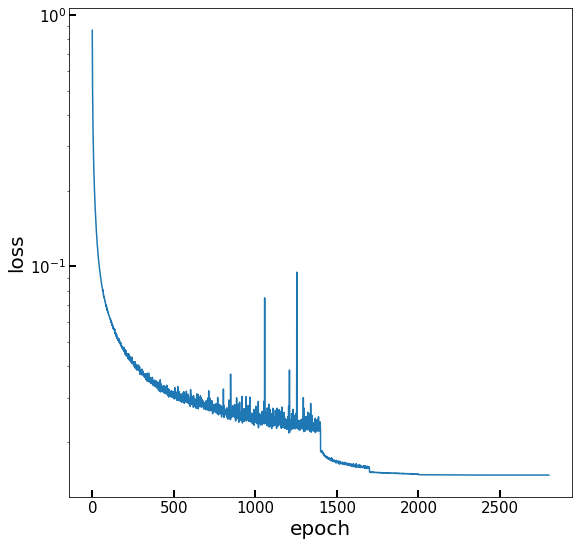

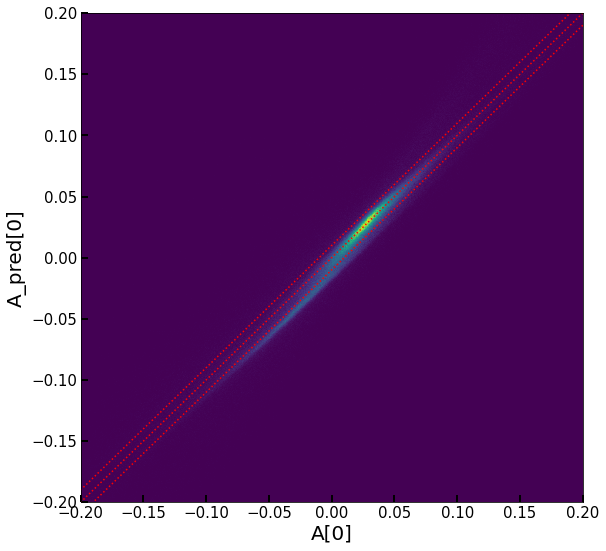

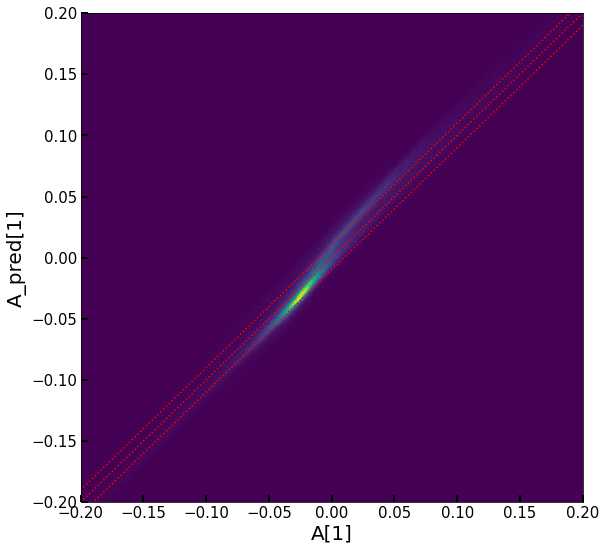

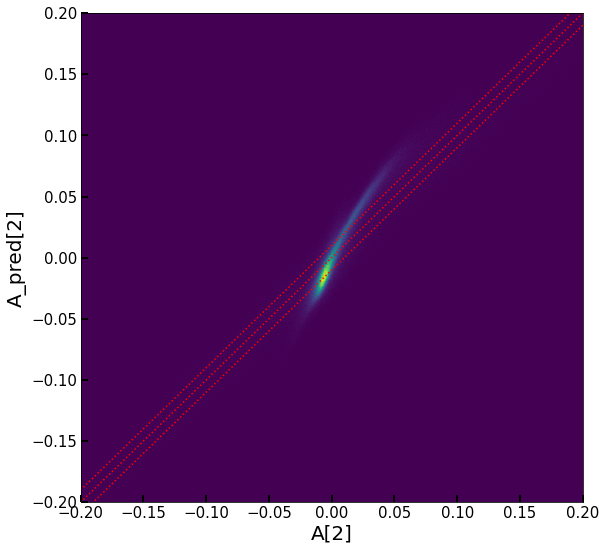

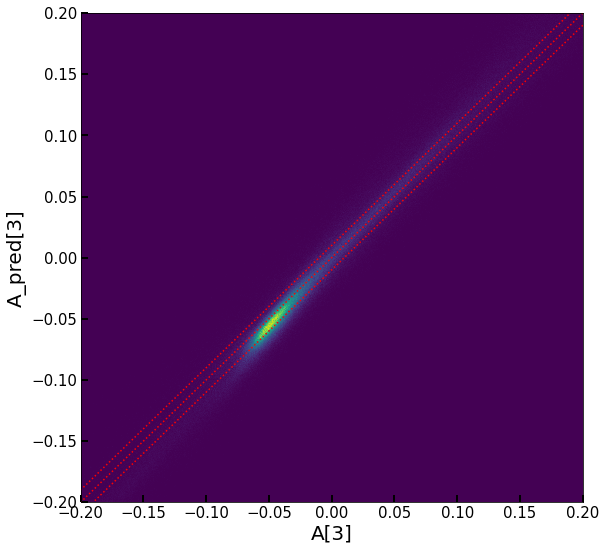

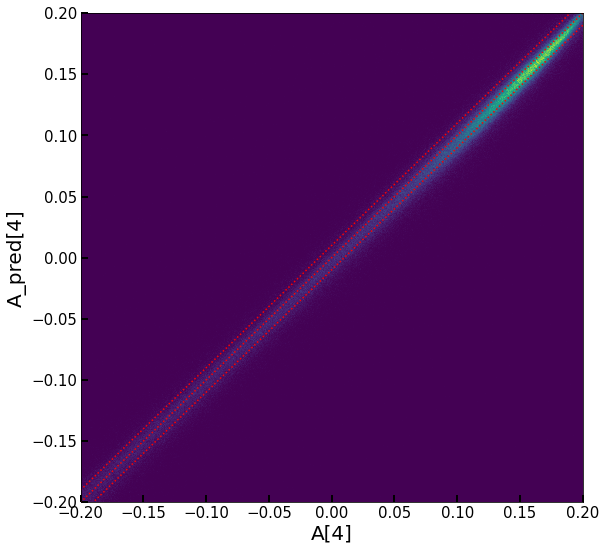

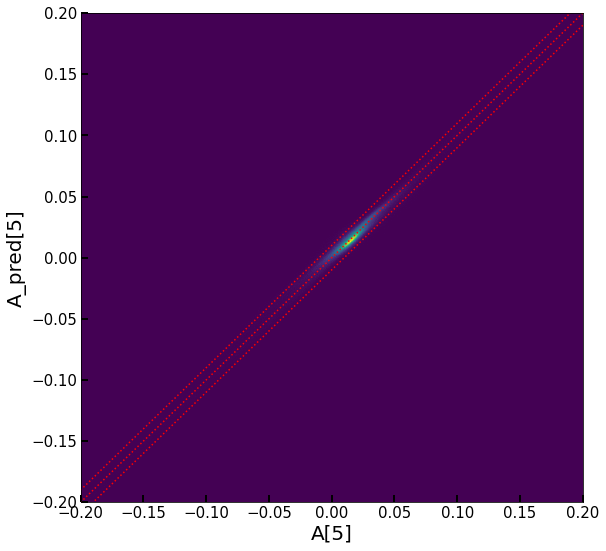

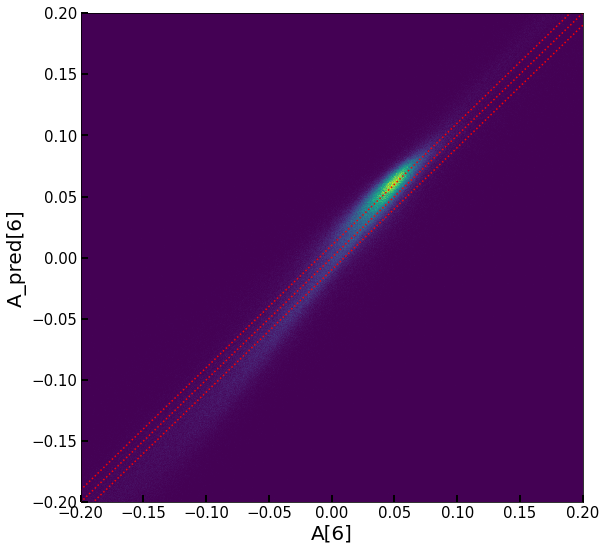

INFO:tensorflow:Assets written to: 5_7_1/assets


In [9]:
auto_AE(hidden_dim = 5,n_input=7,n_layers=1,epochs=1400)

Epoch 1/1400
289/289 [==============================] - 1s 1ms/step - loss: 1.0513
Epoch 2/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.7871
Epoch 3/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.5618
Epoch 4/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.5005
Epoch 5/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.4799
Epoch 6/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.4478
Epoch 7/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.3728
Epoch 8/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.3890
Epoch 9/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.4087
Epoch 10/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.3144
Epoch 11/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.3085
Epoch 12/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.3058
E

289/289 [==============================] - 0s 1ms/step - loss: 0.0718
Epoch 99/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0705
Epoch 100/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0848
Epoch 101/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0715
Epoch 102/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0883
Epoch 103/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0528
Epoch 104/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1037
Epoch 105/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0601
Epoch 106/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0859
Epoch 107/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0850
Epoch 108/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0498
Epoch 109/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0

289/289 [==============================] - 0s 1ms/step - loss: 0.0582
Epoch 195/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0478
Epoch 196/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0493
Epoch 197/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0564
Epoch 198/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1027
Epoch 199/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0676
Epoch 200/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0427
Epoch 201/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0512
Epoch 202/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0636
Epoch 203/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0447
Epoch 204/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0513
Epoch 205/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0453
Epoch 291/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0482
Epoch 292/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0378
Epoch 293/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0507
Epoch 294/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0396
Epoch 295/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0354
Epoch 296/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0378
Epoch 297/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0380
Epoch 298/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0512
Epoch 299/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0331
Epoch 300/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0303
Epoch 301/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0530
Epoch 387/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 388/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0398
Epoch 389/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0432
Epoch 390/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0345
Epoch 391/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0434
Epoch 392/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 393/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0513
Epoch 394/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0402
Epoch 395/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0412
Epoch 396/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 397/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0726
Epoch 483/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0554
Epoch 484/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 485/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0376
Epoch 486/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 487/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0355
Epoch 488/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 489/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0301
Epoch 490/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0709
Epoch 491/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0366
Epoch 492/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 493/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0460
Epoch 579/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 580/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0235
Epoch 581/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0364
Epoch 582/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 583/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0510
Epoch 584/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 585/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0340
Epoch 586/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0242
Epoch 587/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0449
Epoch 588/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0292
Epoch 589/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0264
Epoch 675/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0421
Epoch 676/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0362
Epoch 677/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0396
Epoch 678/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0279
Epoch 679/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0322
Epoch 680/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 681/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0230
Epoch 682/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0274
Epoch 683/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 684/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 685/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0202
Epoch 771/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0307
Epoch 772/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0268
Epoch 773/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 774/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0292
Epoch 775/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0391
Epoch 776/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0355
Epoch 777/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0275
Epoch 778/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 779/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0355
Epoch 780/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0304
Epoch 781/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0228
Epoch 867/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0327
Epoch 868/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0239
Epoch 869/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0389
Epoch 870/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0339
Epoch 871/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0348
Epoch 872/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0281
Epoch 873/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0254
Epoch 874/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 875/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0317
Epoch 876/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0280
Epoch 877/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0292
Epoch 963/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0206
Epoch 964/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0312
Epoch 965/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 966/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0214
Epoch 967/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 968/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0269
Epoch 969/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0337
Epoch 970/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0316
Epoch 971/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 972/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0210
Epoch 973/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0303
Epoch 1058/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0227
Epoch 1059/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0212
Epoch 1060/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0343
Epoch 1061/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0202
Epoch 1062/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0199
Epoch 1063/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0286
Epoch 1064/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0239
Epoch 1065/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0255
Epoch 1066/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0174
Epoch 1067/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0317
Epoch 1068/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0259
Epoch 1153/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0439
Epoch 1154/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0306
Epoch 1155/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0239
Epoch 1156/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0265
Epoch 1157/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0303
Epoch 1158/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0320
Epoch 1159/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0240
Epoch 1160/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 1161/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 1162/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0382
Epoch 1163/1400
289/289 [==============================] - 0s 990us/st

289/289 [==============================] - 0s 989us/step - loss: 0.0241
Epoch 1247/1400
289/289 [==============================] - 0s 987us/step - loss: 0.0167
Epoch 1248/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 1249/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0281
Epoch 1250/1400
289/289 [==============================] - 0s 983us/step - loss: 0.0169
Epoch 1251/1400
289/289 [==============================] - 0s 984us/step - loss: 0.0316
Epoch 1252/1400
289/289 [==============================] - 0s 985us/step - loss: 0.0328
Epoch 1253/1400
289/289 [==============================] - 0s 985us/step - loss: 0.0342
Epoch 1254/1400
289/289 [==============================] - 0s 981us/step - loss: 0.0207
Epoch 1255/1400
289/289 [==============================] - 0s 980us/step - loss: 0.0245
Epoch 1256/1400
289/289 [==============================] - 0s 987us/step - loss: 0.0271
Epoch 1257/1400
289/289 [===========================

289/289 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 1341/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0287
Epoch 1342/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0213
Epoch 1343/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0236
Epoch 1344/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0286
Epoch 1345/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 1346/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0321
Epoch 1347/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 1348/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0334
Epoch 1349/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0230
Epoch 1350/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0232
Epoch 1351/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0210
Epoch 37/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0210
Epoch 38/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0211
Epoch 39/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0210
Epoch 40/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0210
Epoch 41/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0210
Epoch 42/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0210
Epoch 43/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0209
Epoch 44/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0210
Epoch 45/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0209
Epoch 46/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0210
Epoch 47/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0210
Epoch 

289/289 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 134/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0204
Epoch 135/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 136/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 137/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0202
Epoch 138/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 139/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0202
Epoch 140/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0204
Epoch 141/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 142/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0202
Epoch 143/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0202
Epoch 144/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0196
Epoch 230/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 231/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 232/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 233/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 234/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 235/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 236/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 237/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 238/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 239/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 240/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 326/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 327/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 328/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 329/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 330/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 331/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 332/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 333/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 334/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 335/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 336/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 422/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 423/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 424/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 425/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 426/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 427/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 428/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 429/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 430/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0190
Epoch 431/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 432/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 518/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 519/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 520/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 521/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 522/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 523/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 524/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 525/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 526/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 527/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0189
Epoch 528/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 614/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 615/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 616/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 617/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 618/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 619/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 620/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 621/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 622/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 623/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 624/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 710/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 711/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 712/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 713/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 714/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 715/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 716/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 717/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 718/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 719/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 720/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 806/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 807/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 808/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 809/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 810/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 811/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 812/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 813/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 814/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 815/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 816/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 902/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 903/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 904/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 905/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 906/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 907/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 908/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 909/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 910/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 911/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 912/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 998/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 999/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1000/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1001/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1002/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1003/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1004/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1005/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1006/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1007/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1008/1400
289/289 [==============================] - 0s 1ms/step -

289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1093/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1094/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1095/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1096/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1097/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1098/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1099/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1100/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1101/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1102/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1103/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1188/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1189/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1190/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1191/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1192/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1193/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1194/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1195/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1196/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1197/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1198/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1283/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1284/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1285/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1286/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1287/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1288/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1289/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1290/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1291/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1292/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1293/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1378/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1379/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1380/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1381/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1382/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1383/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1384/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1385/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1386/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1387/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0188
Epoch 1388/1400
289/289 [==============================] - 0s 1ms/step

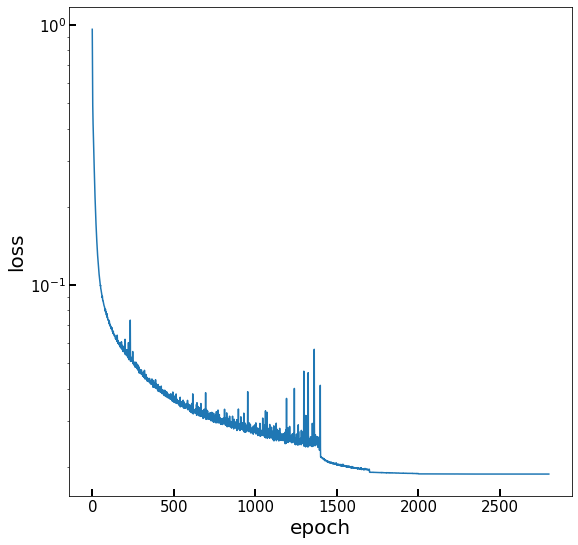

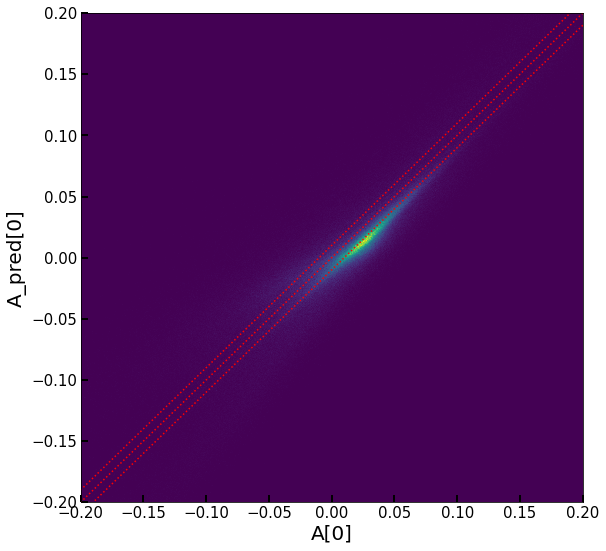

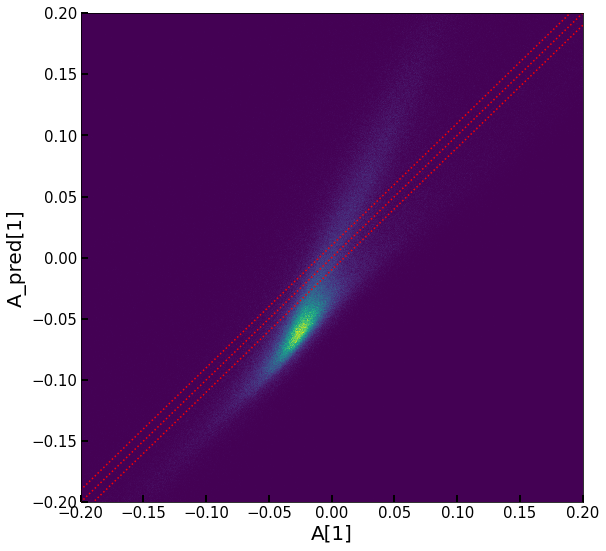

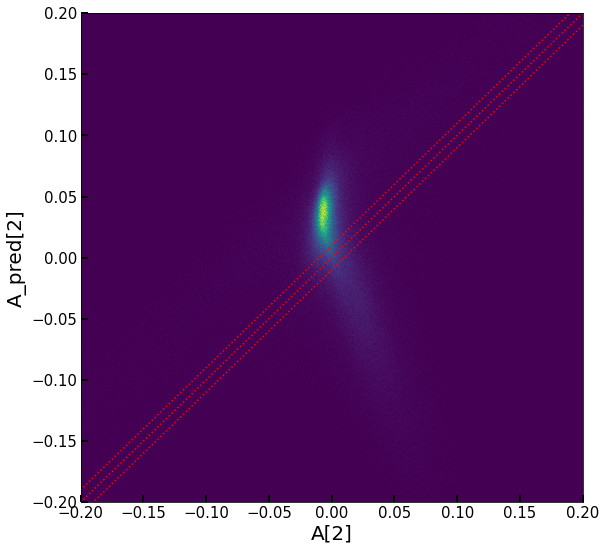

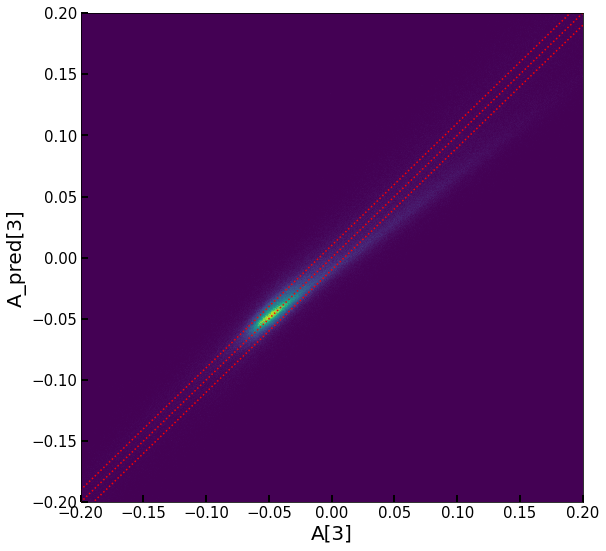

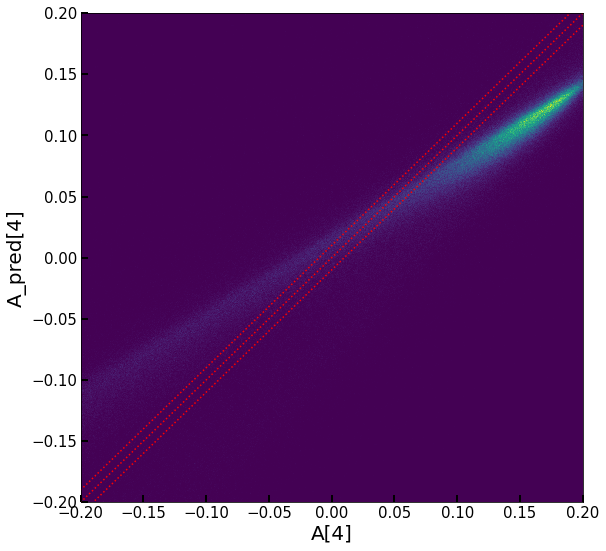

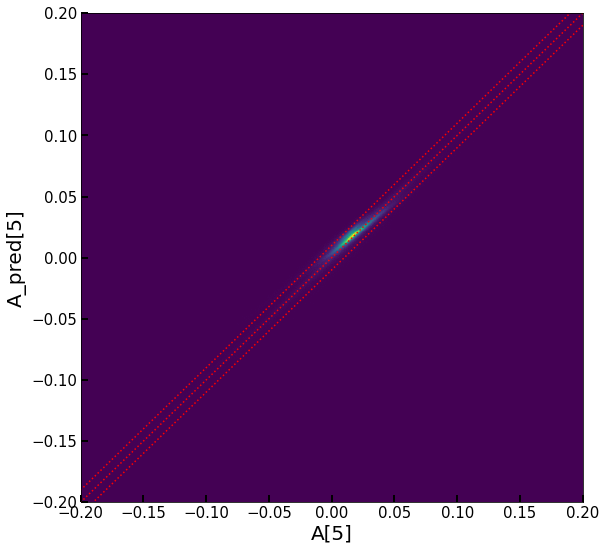

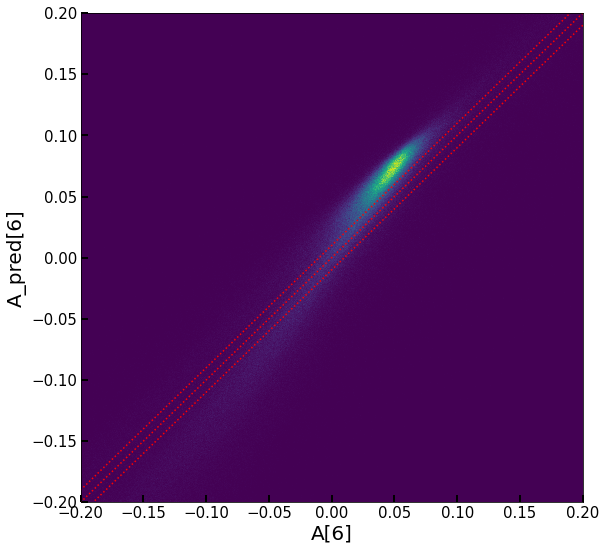

INFO:tensorflow:Assets written to: 4_7_1/assets


In [12]:
auto_AE(hidden_dim = 4,n_input=7,n_layers=1,epochs=1400)

Epoch 1/1400
289/289 [==============================] - 1s 1ms/step - loss: 0.9771
Epoch 2/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.7292
Epoch 3/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.5472
Epoch 4/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.4766
Epoch 5/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.3963
Epoch 6/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.4000
Epoch 7/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.3727
Epoch 8/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.3213
Epoch 9/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.3438
Epoch 10/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.3126
Epoch 11/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.3492
Epoch 12/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.3423
E

289/289 [==============================] - 0s 1ms/step - loss: 0.1271
Epoch 99/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1487
Epoch 100/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1458
Epoch 101/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1249
Epoch 102/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1289
Epoch 103/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1300
Epoch 104/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1290
Epoch 105/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1501
Epoch 106/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1298
Epoch 107/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1390
Epoch 108/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1308
Epoch 109/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1

289/289 [==============================] - 0s 1ms/step - loss: 0.1451
Epoch 195/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1024
Epoch 196/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1021
Epoch 197/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1100
Epoch 198/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0875
Epoch 199/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0928
Epoch 200/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0948
Epoch 201/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1089
Epoch 202/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1011
Epoch 203/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0895
Epoch 204/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1467
Epoch 205/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0722
Epoch 291/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0520
Epoch 292/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0820
Epoch 293/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0674
Epoch 294/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0767
Epoch 295/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0813
Epoch 296/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0653
Epoch 297/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0685
Epoch 298/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0717
Epoch 299/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1163
Epoch 300/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0647
Epoch 301/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0640
Epoch 387/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0550
Epoch 388/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0626
Epoch 389/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0621
Epoch 390/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0485
Epoch 391/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0691
Epoch 392/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0674
Epoch 393/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0606
Epoch 394/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0747
Epoch 395/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0745
Epoch 396/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0617
Epoch 397/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0531
Epoch 483/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0528
Epoch 484/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0627
Epoch 485/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0602
Epoch 486/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0496
Epoch 487/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0565
Epoch 488/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0512
Epoch 489/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0485
Epoch 490/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0570
Epoch 491/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0535
Epoch 492/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0568
Epoch 493/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0443
Epoch 579/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0405
Epoch 580/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0463
Epoch 581/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0503
Epoch 582/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0569
Epoch 583/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0385
Epoch 584/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0506
Epoch 585/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0396
Epoch 586/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0545
Epoch 587/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0382
Epoch 588/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0860
Epoch 589/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0576
Epoch 675/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0549
Epoch 676/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0410
Epoch 677/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0508
Epoch 678/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0452
Epoch 679/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0342
Epoch 680/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0435
Epoch 681/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0402
Epoch 682/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0375
Epoch 683/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0459
Epoch 684/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0507
Epoch 685/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0460
Epoch 771/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0405
Epoch 772/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0709
Epoch 773/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0406
Epoch 774/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0391
Epoch 775/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0429
Epoch 776/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0555
Epoch 777/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0517
Epoch 778/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0505
Epoch 779/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0431
Epoch 780/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.1821
Epoch 781/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0389
Epoch 867/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0532
Epoch 868/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0460
Epoch 869/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0535
Epoch 870/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0450
Epoch 871/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0738
Epoch 872/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 873/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0420
Epoch 874/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0498
Epoch 875/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0335
Epoch 876/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0441
Epoch 877/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0362
Epoch 963/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0645
Epoch 964/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0316
Epoch 965/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0435
Epoch 966/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0347
Epoch 967/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0530
Epoch 968/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0744
Epoch 969/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0391
Epoch 970/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0479
Epoch 971/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0586
Epoch 972/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0436
Epoch 973/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0352
Epoch 1058/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0424
Epoch 1059/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0528
Epoch 1060/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0516
Epoch 1061/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0584
Epoch 1062/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0426
Epoch 1063/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0436
Epoch 1064/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0354
Epoch 1065/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0515
Epoch 1066/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0508
Epoch 1067/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0375
Epoch 1068/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0316
Epoch 1153/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0333
Epoch 1154/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0412
Epoch 1155/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0385
Epoch 1156/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0452
Epoch 1157/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0630
Epoch 1158/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0417
Epoch 1159/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0467
Epoch 1160/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0418
Epoch 1161/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0670
Epoch 1162/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0391
Epoch 1163/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0354
Epoch 1248/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0404
Epoch 1249/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0356
Epoch 1250/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0585
Epoch 1251/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0393
Epoch 1252/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0386
Epoch 1253/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0334
Epoch 1254/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0419
Epoch 1255/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0512
Epoch 1256/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 1257/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0483
Epoch 1258/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0904
Epoch 1343/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0440
Epoch 1344/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0328
Epoch 1345/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0421
Epoch 1346/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0532
Epoch 1347/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0430
Epoch 1348/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0692
Epoch 1349/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0327
Epoch 1350/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0399
Epoch 1351/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0429
Epoch 1352/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0564
Epoch 1353/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0336
Epoch 39/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0335
Epoch 40/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0335
Epoch 41/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0334
Epoch 42/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0335
Epoch 43/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0334
Epoch 44/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0334
Epoch 45/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0335
Epoch 46/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0334
Epoch 47/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0335
Epoch 48/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0335
Epoch 49/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0334
Epoch 

289/289 [==============================] - 0s 1ms/step - loss: 0.0327
Epoch 136/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0325
Epoch 137/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 138/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0325
Epoch 139/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 140/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0325
Epoch 141/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0325
Epoch 142/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 143/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 144/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0325
Epoch 145/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 146/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0320
Epoch 232/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0321
Epoch 233/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 234/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 235/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0320
Epoch 236/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 237/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 238/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0321
Epoch 239/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 240/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0320
Epoch 241/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 242/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 328/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 329/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 330/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 331/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 332/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 333/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 334/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 335/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 336/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 337/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 338/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 424/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 425/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 426/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0312
Epoch 427/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 428/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 429/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 430/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 431/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 432/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 433/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 434/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0310
Epoch 520/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0310
Epoch 521/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0310
Epoch 522/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0310
Epoch 523/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0310
Epoch 524/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0310
Epoch 525/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0310
Epoch 526/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0310
Epoch 527/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0310
Epoch 528/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0310
Epoch 529/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0310
Epoch 530/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 616/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 617/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 618/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 619/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 620/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 621/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 622/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 623/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 624/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 625/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 626/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 712/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 713/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 714/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 715/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 716/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 717/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 718/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 719/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 720/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 721/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 722/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 808/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 809/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 810/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 811/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 812/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 813/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 814/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 815/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 816/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 817/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 818/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 904/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 905/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 906/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 907/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 908/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 909/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 910/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 911/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 912/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 913/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 914/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.

289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1000/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1001/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1002/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1003/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1004/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1005/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1006/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1007/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1008/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1009/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1010/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1095/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1096/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1097/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1098/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1099/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1100/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1101/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1102/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1103/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1104/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1105/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1190/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1191/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1192/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1193/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1194/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1195/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1196/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1197/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1198/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1199/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0309
Epoch 1200/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1285/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1286/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1287/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1288/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1289/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1290/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1291/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1292/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1293/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1294/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1295/1400
289/289 [==============================] - 0s 1ms/step

289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1380/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1381/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1382/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1383/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1384/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1385/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1386/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1387/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1388/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1389/1400
289/289 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 1390/1400
289/289 [==============================] - 0s 1ms/step

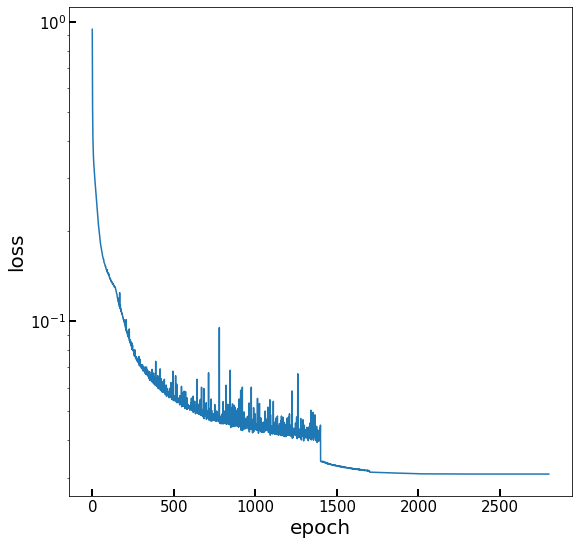

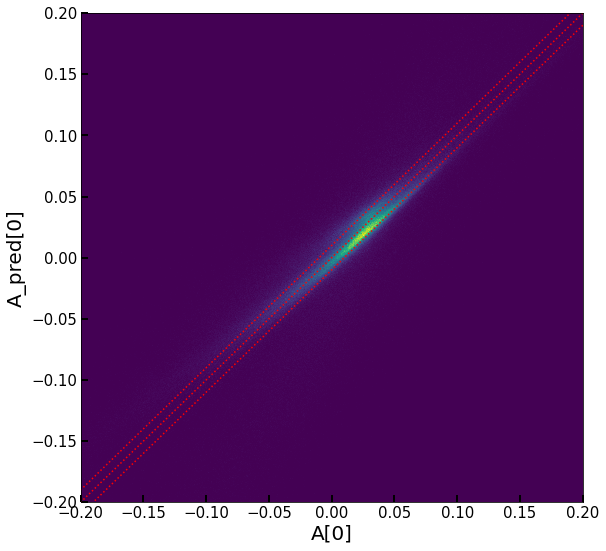

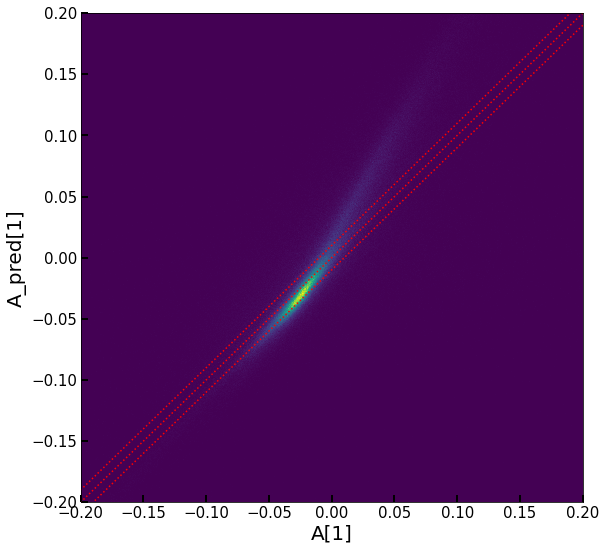

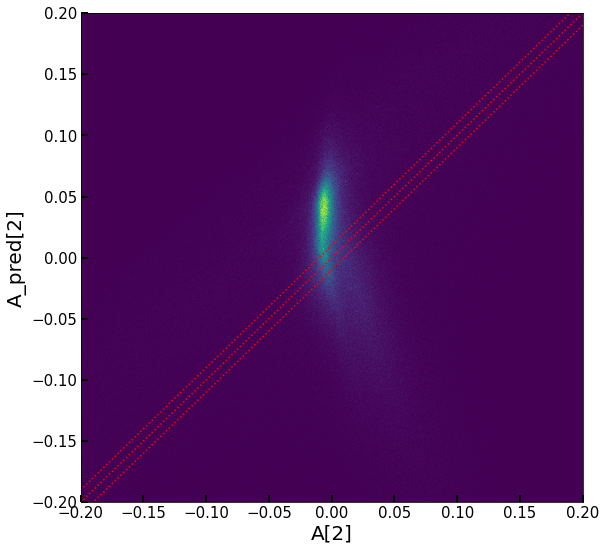

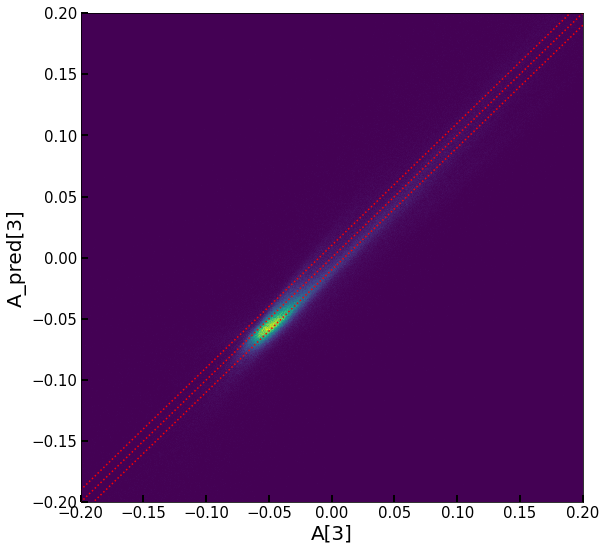

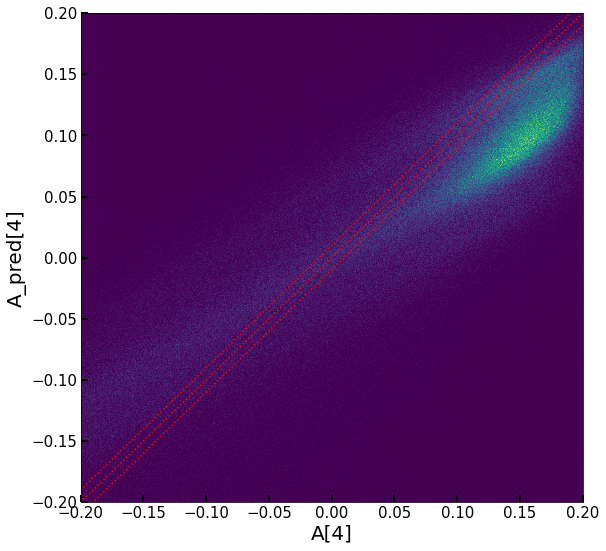

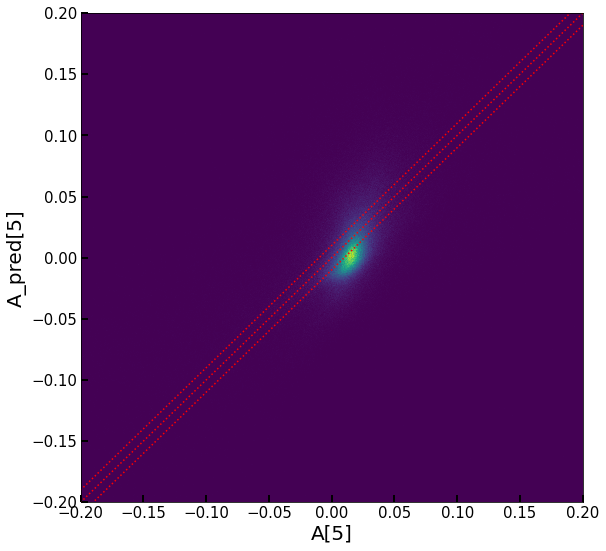

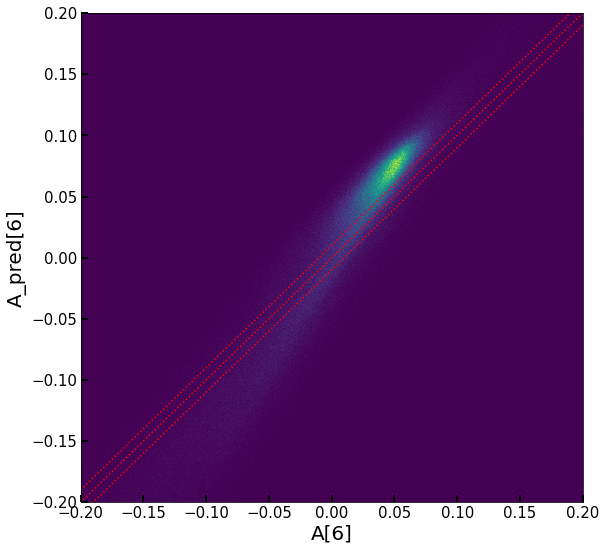

INFO:tensorflow:Assets written to: 4_7_2/assets


In [13]:
auto_AE(hidden_dim = 4,n_input=7,n_layers=2,epochs=1400)